### Confidence Intervals - Part I- practice example from Udacity


In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) 

In [4]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [5]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [7]:
coffee_full.shape

(2974, 4)

In [8]:
coffee_red.shape

(200, 4)

Coffee red is small sample of coffee full

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [10]:
# coffee drinkers in the sample
coffee_red.drinks_coffee.mean()

0.595

In [16]:
#  not coffee drinkers in the sample
1 - coffee_red['drinks_coffee'].mean()

0.405

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [17]:
# Average height of individuals who drink coffee
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean()

68.11962990858618

In [18]:
# Average height of individuals who drink coffee
coffee_red[coffee_red['drinks_coffee']== False]['height'].mean()

66.78492279927877

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [19]:
bootsamp = coffee_red.sample(200, replace = True)

In [20]:
#avarge of who drinks coffee
bootsamp['drinks_coffee'].mean()

0.605

In [21]:
#avarge of who doe not drink coffee
1- bootsamp['drinks_coffee'].mean()

0.395

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

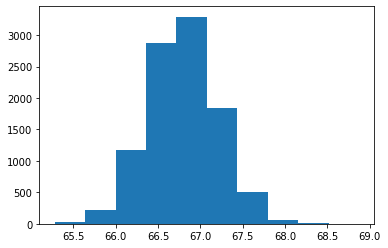

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means);

In [36]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(66.00849687671518, 67.58738719180009)

**confidence interval interpretation**
we are 95% confident the mean hight of all non coffee drinkers is between 66 and 67.58 inches tall.

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [37]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean() 

66.44340776214705